In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.nn as nn
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys
sys.path.insert(0,'/content/gdrive/MyDrive/C247_NNDL_Project/helper_functions')
from utils import augment_data, load_eeg_data
from models import eeg_CNN_LSTM_Model, eeg_CNN_FFT_Model, eeg_CNN_Model

# CNN - LSTM

## CNN - train for each subject, test individually.

In [4]:
# Hyperparams
EPOCHS = 300
batch_size = 256

Subject: 0
X_train_valid: (237, 1000, 22)
y_train_valid: (237,)
X_test: (50, 1000, 22)
y_test: (50,)
(567, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 10s 1s/step - loss: 1.3893 - accuracy: 0.2646 - val_loss: 1.5183 - val_accuracy: 0.2292
Epoch 2/300
3/3 [==============================] - 1s 175ms/step - loss: 1.3459 - accuracy: 0.3316 - val_loss: 1.5486 - val_accuracy: 0.2292
Epoch 3/300
3/3 [==============================] - 1s 173ms/step - loss: 1.3186 - accuracy: 0.3792 - val_loss: 1.6653 - val_accuracy: 0.2292
Epoch 4/300
3/3 [==============================] - 1s 170ms/step - loss: 1.2831 - accuracy: 0.3704 - val_loss: 2.0533 - val_accuracy: 0.2292
Epoch 5/300
3/3 [==============================] - 1s 178ms/step - loss: 1.2414 - accuracy: 0.3968 - val_loss: 1.9215 - val_accuracy: 0.2292
Epoch 6/300
3/3 [==============================] - 1s 168ms/step - loss: 1.1523 - accuracy: 0.4709 - val_loss: 1.6082 - val_accuracy: 0.2500
Epo

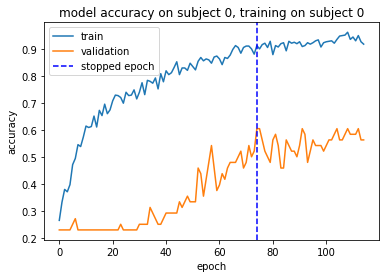

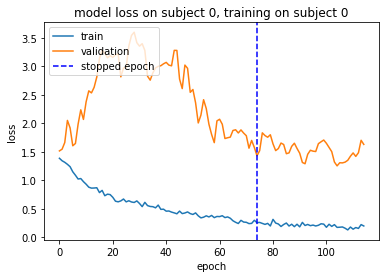

Subject: 1
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(564, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 8s 686ms/step - loss: 1.3707 - accuracy: 0.2890 - val_loss: 1.4254 - val_accuracy: 0.2083
Epoch 2/300
3/3 [==============================] - 1s 171ms/step - loss: 1.3508 - accuracy: 0.3245 - val_loss: 1.4556 - val_accuracy: 0.2083
Epoch 3/300
3/3 [==============================] - 1s 169ms/step - loss: 1.3273 - accuracy: 0.3457 - val_loss: 1.4851 - val_accuracy: 0.2083
Epoch 4/300
3/3 [==============================] - 1s 185ms/step - loss: 1.3085 - accuracy: 0.3582 - val_loss: 1.4463 - val_accuracy: 0.2083
Epoch 5/300
3/3 [==============================] - 1s 174ms/step - loss: 1.2897 - accuracy: 0.3936 - val_loss: 1.3983 - val_accuracy: 0.3542
Epoch 6/300
3/3 [==============================] - 1s 183ms/step - loss: 1.2525 - accuracy: 0.4238 - val_loss: 1.4112 - val_accuracy: 0.2708
E

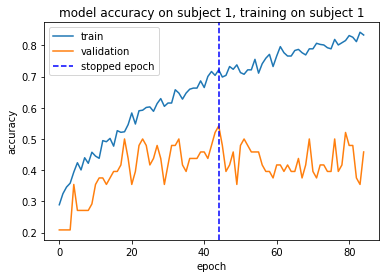

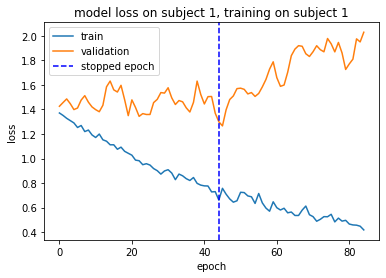

Subject: 2
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(564, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 8s 681ms/step - loss: 1.3900 - accuracy: 0.2589 - val_loss: 1.4027 - val_accuracy: 0.2292
Epoch 2/300
3/3 [==============================] - 1s 168ms/step - loss: 1.3557 - accuracy: 0.3050 - val_loss: 1.4273 - val_accuracy: 0.2917
Epoch 3/300
3/3 [==============================] - 1s 181ms/step - loss: 1.3347 - accuracy: 0.3227 - val_loss: 1.4827 - val_accuracy: 0.3125
Epoch 4/300
3/3 [==============================] - 1s 171ms/step - loss: 1.3081 - accuracy: 0.3599 - val_loss: 1.5145 - val_accuracy: 0.3750
Epoch 5/300
3/3 [==============================] - 1s 177ms/step - loss: 1.2786 - accuracy: 0.3794 - val_loss: 1.5563 - val_accuracy: 0.3333
Epoch 6/300
3/3 [==============================] - 1s 195ms/step - loss: 1.2396 - accuracy: 0.4326 - val_loss: 1.6149 - val_accuracy: 0.3333
E

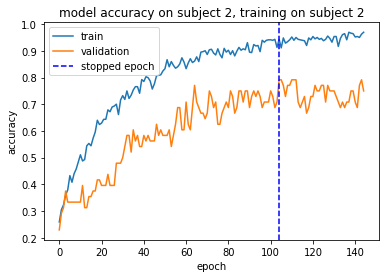

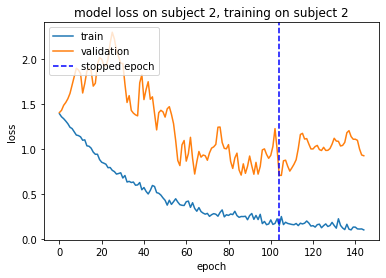

Subject: 3
X_train_valid: (234, 1000, 22)
y_train_valid: (234,)
X_test: (50, 1000, 22)
y_test: (50,)
(561, 250, 1, 22)
(47, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 8s 1s/step - loss: 1.3882 - accuracy: 0.2549 - val_loss: 1.4590 - val_accuracy: 0.1702
Epoch 2/300
3/3 [==============================] - 1s 183ms/step - loss: 1.3638 - accuracy: 0.3137 - val_loss: 1.4974 - val_accuracy: 0.1915
Epoch 3/300
3/3 [==============================] - 1s 209ms/step - loss: 1.3548 - accuracy: 0.3298 - val_loss: 1.5794 - val_accuracy: 0.1915
Epoch 4/300
3/3 [==============================] - 1s 175ms/step - loss: 1.3452 - accuracy: 0.3601 - val_loss: 1.6333 - val_accuracy: 0.1915
Epoch 5/300
3/3 [==============================] - 1s 172ms/step - loss: 1.3031 - accuracy: 0.3743 - val_loss: 1.7056 - val_accuracy: 0.1915
Epoch 6/300
3/3 [==============================] - 1s 169ms/step - loss: 1.3242 - accuracy: 0.3636 - val_loss: 1.7860 - val_accuracy: 0.1915
Epoc

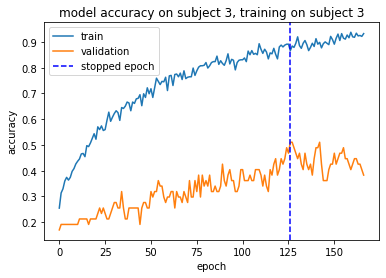

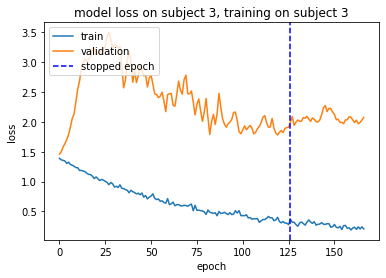

Subject: 4
X_train_valid: (235, 1000, 22)
y_train_valid: (235,)
X_test: (47, 1000, 22)
y_test: (47,)
(564, 250, 1, 22)
(47, 250, 1, 22)
(47, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 9s 680ms/step - loss: 1.3913 - accuracy: 0.2801 - val_loss: 1.3700 - val_accuracy: 0.2766
Epoch 2/300
3/3 [==============================] - 1s 176ms/step - loss: 1.3686 - accuracy: 0.3014 - val_loss: 1.4118 - val_accuracy: 0.2553
Epoch 3/300
3/3 [==============================] - 1s 202ms/step - loss: 1.3510 - accuracy: 0.3156 - val_loss: 1.4780 - val_accuracy: 0.2340
Epoch 4/300
3/3 [==============================] - 1s 185ms/step - loss: 1.3247 - accuracy: 0.3511 - val_loss: 1.5698 - val_accuracy: 0.2340
Epoch 5/300
3/3 [==============================] - 1s 183ms/step - loss: 1.2887 - accuracy: 0.3989 - val_loss: 1.7059 - val_accuracy: 0.2340
Epoch 6/300
3/3 [==============================] - 1s 178ms/step - loss: 1.2505 - accuracy: 0.4096 - val_loss: 1.8276 - val_accuracy: 0.1702
E

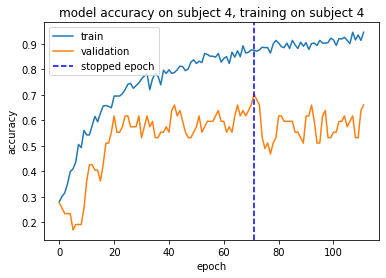

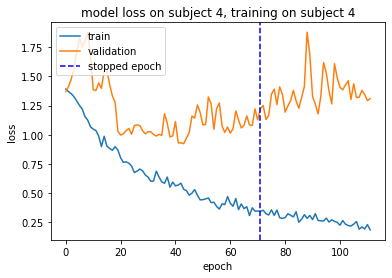

Subject: 5
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (49, 1000, 22)
y_test: (49,)
(564, 250, 1, 22)
(48, 250, 1, 22)
(49, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 7s 702ms/step - loss: 1.3900 - accuracy: 0.2482 - val_loss: 1.4393 - val_accuracy: 0.2708
Epoch 2/300
3/3 [==============================] - 1s 181ms/step - loss: 1.3603 - accuracy: 0.3316 - val_loss: 1.5524 - val_accuracy: 0.2708
Epoch 3/300
3/3 [==============================] - 1s 182ms/step - loss: 1.3479 - accuracy: 0.3422 - val_loss: 1.7258 - val_accuracy: 0.2708
Epoch 4/300
3/3 [==============================] - 1s 182ms/step - loss: 1.3055 - accuracy: 0.3830 - val_loss: 1.9089 - val_accuracy: 0.2708
Epoch 5/300
3/3 [==============================] - 1s 190ms/step - loss: 1.2842 - accuracy: 0.3954 - val_loss: 1.9468 - val_accuracy: 0.2708
Epoch 6/300
3/3 [==============================] - 1s 189ms/step - loss: 1.2699 - accuracy: 0.3848 - val_loss: 1.9466 - val_accuracy: 0.2708
E

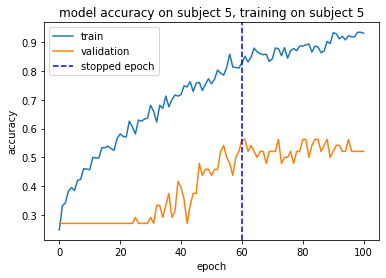

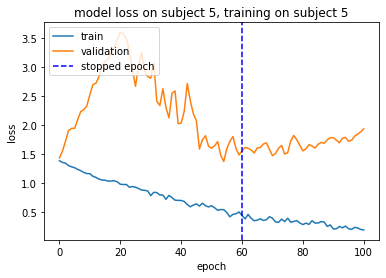

Subject: 6
X_train_valid: (238, 1000, 22)
y_train_valid: (238,)
X_test: (50, 1000, 22)
y_test: (50,)
(570, 250, 1, 22)
(48, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 7s 786ms/step - loss: 1.3757 - accuracy: 0.3175 - val_loss: 1.4017 - val_accuracy: 0.2917
Epoch 2/300
3/3 [==============================] - 1s 349ms/step - loss: 1.3262 - accuracy: 0.3544 - val_loss: 1.5497 - val_accuracy: 0.2292
Epoch 3/300
3/3 [==============================] - 1s 370ms/step - loss: 1.2662 - accuracy: 0.4456 - val_loss: 1.7948 - val_accuracy: 0.2292
Epoch 4/300
3/3 [==============================] - 1s 342ms/step - loss: 1.2299 - accuracy: 0.4526 - val_loss: 1.8646 - val_accuracy: 0.2292
Epoch 5/300
3/3 [==============================] - 1s 183ms/step - loss: 1.1250 - accuracy: 0.5246 - val_loss: 1.7785 - val_accuracy: 0.2500
Epoch 6/300
3/3 [==============================] - 1s 182ms/step - loss: 1.1088 - accuracy: 0.5000 - val_loss: 1.5205 - val_accuracy: 0.3750
E

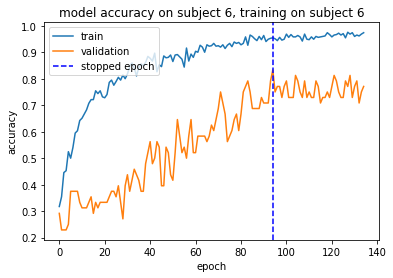

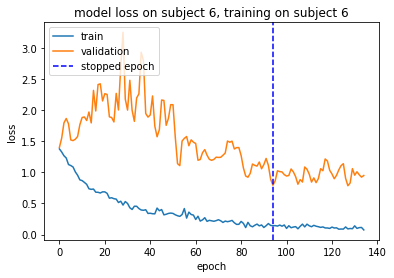

Subject: 7
X_train_valid: (232, 1000, 22)
y_train_valid: (232,)
X_test: (50, 1000, 22)
y_test: (50,)
(555, 250, 1, 22)
(47, 250, 1, 22)
(50, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 9s 1s/step - loss: 1.3839 - accuracy: 0.2919 - val_loss: 1.4591 - val_accuracy: 0.2340
Epoch 2/300
3/3 [==============================] - 1s 186ms/step - loss: 1.3147 - accuracy: 0.3910 - val_loss: 1.6829 - val_accuracy: 0.2340
Epoch 3/300
3/3 [==============================] - 1s 206ms/step - loss: 1.3045 - accuracy: 0.3766 - val_loss: 2.0002 - val_accuracy: 0.2340
Epoch 4/300
3/3 [==============================] - 1s 210ms/step - loss: 1.2799 - accuracy: 0.4000 - val_loss: 2.2143 - val_accuracy: 0.2340
Epoch 5/300
3/3 [==============================] - 1s 191ms/step - loss: 1.2247 - accuracy: 0.4505 - val_loss: 2.3293 - val_accuracy: 0.2340
Epoch 6/300
3/3 [==============================] - 1s 329ms/step - loss: 1.1885 - accuracy: 0.4486 - val_loss: 2.1965 - val_accuracy: 0.2340
Epoc

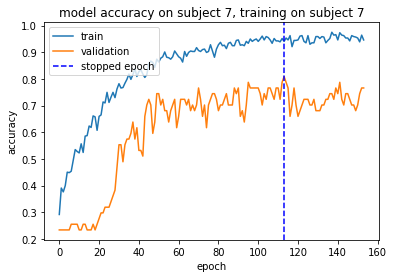

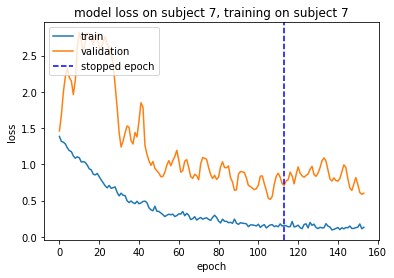

Subject: 8
X_train_valid: (231, 1000, 22)
y_train_valid: (231,)
X_test: (47, 1000, 22)
y_test: (47,)
(552, 250, 1, 22)
(47, 250, 1, 22)
(47, 250, 1, 22)
Epoch 1/300
3/3 [==============================] - 8s 669ms/step - loss: 1.3805 - accuracy: 0.2663 - val_loss: 1.4801 - val_accuracy: 0.2340
Epoch 2/300
3/3 [==============================] - 1s 178ms/step - loss: 1.3101 - accuracy: 0.4076 - val_loss: 1.6322 - val_accuracy: 0.2340
Epoch 3/300
3/3 [==============================] - 1s 178ms/step - loss: 1.2339 - accuracy: 0.4583 - val_loss: 1.8481 - val_accuracy: 0.2340
Epoch 4/300
3/3 [==============================] - 1s 182ms/step - loss: 1.1355 - accuracy: 0.5036 - val_loss: 2.0888 - val_accuracy: 0.2340
Epoch 5/300
3/3 [==============================] - 1s 179ms/step - loss: 1.0758 - accuracy: 0.5181 - val_loss: 2.2698 - val_accuracy: 0.2340
Epoch 6/300
3/3 [==============================] - 1s 180ms/step - loss: 1.0349 - accuracy: 0.5471 - val_loss: 2.3839 - val_accuracy: 0.2340
E

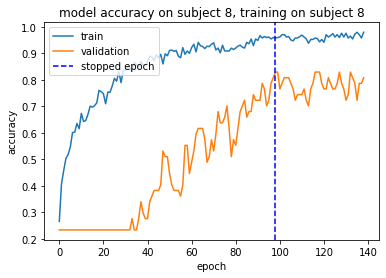

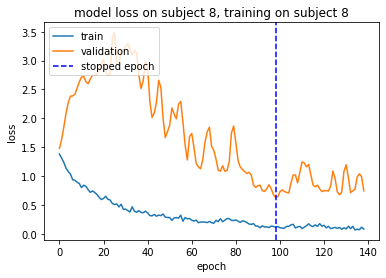

In [5]:
# Train for each subject
test_accuracies = []
test_losses = []
valid_accuracies = []
valid_losses = []
train_accuracies = []
train_losses = []

for subject in range(9):
  print('Subject:', subject)

  # import data
  data = load_eeg_data(subject_index = subject, one_hot_ylabel=False)

  # train/valid split and preprocessing
  X_train, X_valid, y_train, y_valid = train_test_split(data['X_train_valid'], data['y_train_valid'], test_size=0.2)
  
  X_train, y_train = augment_data(X_train, y_train, noise_var = 0.5) 
  X_valid, y_valid = augment_data(X_valid, y_valid, noise=False, filter=False, max_pool=False, avg_pool=False)
  X_test, y_test = augment_data(data['X_test'], data['y_test'], noise=False, filter=False, max_pool=False, avg_pool=False) 
  
  X_train = np.expand_dims(X_train, axis = -2)
  X_valid = np.expand_dims(X_valid, axis = -2)
  X_test = np.expand_dims(X_test, axis = -2)
  
  print(X_train.shape)
  print(X_valid.shape)
  print(X_test.shape)

  train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
  valid = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
  test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

  # batch and shuffle
  train = train.shuffle(1024).batch(batch_size)
  valid = valid.shuffle(1024).batch(batch_size)
  test = test.shuffle(1024).batch(batch_size)

  # define early stopping
  cb = tf.keras.callbacks.EarlyStopping(
      monitor="val_accuracy",
      min_delta=0,
      patience=40,
      verbose=1,
      mode="auto",
      baseline=None,
      restore_best_weights=True,
      start_from_epoch=0,
  )

  # define learning schedule
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=0.005,
      decay_steps=20,
      decay_rate=0.98,
      staircase=True)

  # define loss function
  loss_fn = keras.losses.SparseCategoricalCrossentropy()

  # define optimizer
  opt = keras.optimizers.Adam(learning_rate=lr_schedule)

  # build model
  input_shape = X_train.shape[1:]
  model = eeg_CNN_LSTM_Model(input_shape)

  # compile model
  model.compile(optimizer=opt, loss=loss_fn, metrics='accuracy')

  # fit model
  history = model.fit(x=train, validation_data=valid, epochs=EPOCHS, callbacks=cb)

  # test model
  print("----- TEST -----")
  eval = model.evaluate(test)
  test_loss, test_acc = eval[0], eval[1]
  stop_epoch = cb.stopped_epoch - 40
  valid_loss = history.history['val_loss'][stop_epoch-1]
  print(valid_loss)


  test_losses.append(test_loss)
  test_accuracies.append(test_acc)
  valid_losses.append(valid_loss)
  #valid_accuracies.append(valid_acc)
  #train_losses.append(train_loss)
  #train_accuracies.append(train_acc)
  

  # plotting
  plt.figure()
  # plot history (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.axvline(x = stop_epoch, color = 'b', linestyle='--')
  plt.title('model accuracy on subject {}, training on subject {}'.format(subject, subject))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation', 'stopped epoch'], loc='upper left')
  plt.show()

  plt.figure()
  # plot history (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.axvline(x = stop_epoch, color = 'b', linestyle='--')
  plt.title('model loss on subject {}, training on subject {}'.format(subject, subject))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation', 'stopped epoch'], loc='upper left')
  plt.show()

In [6]:
for i, acc in enumerate(test_accuracies):
  print('Accuracy for subject {} is {}'.format(i, acc))

for i, loss in enumerate(test_losses):
  print('Loss for subject {} is {}'.format(i, loss))

Accuracy for subject 0 is 0.47999998927116394
Accuracy for subject 1 is 0.3400000035762787
Accuracy for subject 2 is 0.6399999856948853
Accuracy for subject 3 is 0.4399999976158142
Accuracy for subject 4 is 0.6808510422706604
Accuracy for subject 5 is 0.40816327929496765
Accuracy for subject 6 is 0.7400000095367432
Accuracy for subject 7 is 0.47999998927116394
Accuracy for subject 8 is 0.7446808218955994
Loss for subject 0 is 1.9504395723342896
Loss for subject 1 is 1.8354443311691284
Loss for subject 2 is 1.245193600654602
Loss for subject 3 is 1.896863579750061
Loss for subject 4 is 1.2252583503723145
Loss for subject 5 is 2.201850652694702
Loss for subject 6 is 0.9533247947692871
Loss for subject 7 is 2.2239952087402344
Loss for subject 8 is 1.049135684967041


## Train on all - test on each individul and also all

In [9]:
# Hyperparams
EPOCHS = 300
batch_size = 512

In [ ]:
# Train on data consisting of all subjects
# import data
data = load_eeg_data(subject_index = None, one_hot_ylabel=False)

# train/valid split and preprocessing
X_train, X_valid, y_train, y_valid = train_test_split(data['X_train_valid'], data['y_train_valid'], test_size=0.2)

X_train, y_train = augment_data(X_train, y_train, noise_var = 0.5) 
X_valid, y_valid = augment_data(X_valid, y_valid, noise=False, filter=False, max_pool=False, avg_pool=False)
X_test, y_test = augment_data(data['X_test'], data['y_test'], noise=False, filter=False, max_pool=False, avg_pool=False) 

X_train = np.expand_dims(X_train, axis = -2)
X_valid = np.expand_dims(X_valid, axis = -2)
X_test = np.expand_dims(X_test, axis = -2)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# batch and shuffle
train = train.shuffle(1024).batch(batch_size)
valid = valid.shuffle(1024).batch(batch_size)
test = test.shuffle(1024).batch(batch_size)

# define early stopping
cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

# define learning schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=20,
    decay_rate=0.98,
    staircase=True)

# define loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# define optimizer
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# build model
input_shape = X_train.shape[1:]
model = eeg_CNN_LSTM_Model(input_shape)

# compile model
model.compile(optimizer=opt, loss=loss_fn, metrics='accuracy')

# fit model
history = model.fit(x=train, validation_data=valid, epochs=EPOCHS, callbacks=cb)

X_train_valid: (2115, 1000, 22)
y_train_valid: (2115,)
X_test: (443, 1000, 22)
y_test: (443,)
(5076, 250, 1, 22)
(423, 250, 1, 22)
(443, 250, 1, 22)
Epoch 1/300
10/10 [==============================] - 16s 1s/step - loss: 1.3715 - accuracy: 0.2983 - val_loss: 1.5426 - val_accuracy: 0.3026
Epoch 2/300
10/10 [==============================] - 7s 670ms/step - loss: 1.3352 - accuracy: 0.3513 - val_loss: 1.7215 - val_accuracy: 0.3144
Epoch 3/300
10/10 [==============================] - 5s 497ms/step - loss: 1.2828 - accuracy: 0.3942 - val_loss: 1.6127 - val_accuracy: 0.3499
Epoch 4/300
10/10 [==============================] - 7s 724ms/step - loss: 1.2239 - accuracy: 0.4324 - val_loss: 1.4583 - val_accuracy: 0.3783
Epoch 5/300
10/10 [==============================] - 5s 492ms/step - loss: 1.1935 - accuracy: 0.4614 - val_loss: 1.5680 - val_accuracy: 0.3688
Epoch 6/300
10/10 [==============================] - 6s 568ms/step - loss: 1.1649 - accuracy: 0.4852 - val_loss: 1.4969 - val_accuracy: 0.

----- TESTING ON ALL SUBJECTS -----
1/1 [==============================] - 0s 153ms/step - loss: 1.0037 - accuracy: 0.5847
loss: 1.0037072896957397
acc: 0.5846500992774963


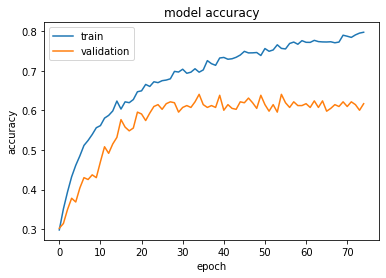

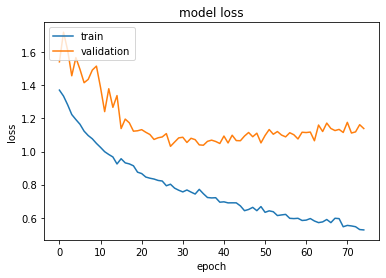

In [ ]:
# Test model on all-subject dataset
print("----- TESTING ON ALL SUBJECTS -----")
eval = model.evaluate(test)
loss, acc = eval[0], eval[1]
print('loss:', loss)
print('acc:', acc)

# plotting
plt.figure()
# plot history (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# plot history (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Test model on each individual subject
for subject in range(9):
  print("----- TESTING ON SUBJECT {} -----".format(subject))

  # import data
  data = load_eeg_data(subject_index = subject, one_hot_ylabel=False)

  # preprocessing
  X_test, y_test = augment_data(data['X_test'], data['y_test'], noise=False, filter=False, max_pool=False, avg_pool=False) 
  X_test = np.expand_dims(X_test, axis = -2)
  print(X_test.shape)
  test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
  test = test.shuffle(1024).batch(batch_size)

  results_test = model.evaluate(test)

  print('Testing Loss: {}'.format(results_test[0]))
  print('Testing Accuracy: {}'.format(results_test[1])) 
  print('\n')

----- TESTING ON SUBJECT 0 -----
X_train_valid: (237, 1000, 22)
y_train_valid: (237,)
X_test: (50, 1000, 22)
y_test: (50,)
(50, 250, 1, 22)
1/1 [==============================] - 0s 40ms/step - loss: 1.2762 - accuracy: 0.4400
Testing Loss: 1.2761911153793335
Testing Accuracy: 0.4399999976158142


----- TESTING ON SUBJECT 1 -----
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(50, 250, 1, 22)
1/1 [==============================] - 0s 37ms/step - loss: 1.3284 - accuracy: 0.3600
Testing Loss: 1.3284461498260498
Testing Accuracy: 0.36000001430511475


----- TESTING ON SUBJECT 2 -----
X_train_valid: (236, 1000, 22)
y_train_valid: (236,)
X_test: (50, 1000, 22)
y_test: (50,)
(50, 250, 1, 22)
1/1 [==============================] - 0s 37ms/step - loss: 0.7745 - accuracy: 0.6600
Testing Loss: 0.7745059132575989
Testing Accuracy: 0.6600000262260437


----- TESTING ON SUBJECT 3 -----
X_train_valid: (234, 1000, 22)
y_train_valid: (234,)
X_test: (50, 1000, 